<a href="https://colab.research.google.com/github/UBC-Astrophysics/QEDSurface/blob/master/IXPEObsSim/test_ixpe_file_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing the `ixpe_file_model` module

## Requirements

* [IXPEObsSim](https://bitbucket.org/ixpesw/ixpeobssim/src/master/)
* Python
* [PyXSPEC](https://heasarc.gsfc.nasa.gov/docs/xanadu/xspec/python/html/index.html)
* [QEDSurface](https://github.com/UBC-Astrophysics/QEDSurface)

Documentation for IXPEObsSim:

https://cocalc.coolpulsars.org/636f9d55-17fa-4cc0-bb9c-ec4e36690581/raw/Neutron-Star-Atmosphere/ixpesw-ixpeobssim-572fa0092131/docs/_build/singlehtml/index.html#document-index

Similar documentation for XIMPOL:

https://buildmedia.readthedocs.org/media/pdf/ximpol/stable/ximpol.pdf

xwiki:

http://xwiki.ssdc.asi.it/xwiki/bin/view/Main/

Bitbucket:

https://bitbucket.org/ixpesw/ixpeobssim/src/master/


## Setting up the ixpe_file_model module


1.   You can find the [ixpe_file_model.py](https://github.com/UBC-Astrophysics/QEDSurface/blob/master/IXPEObsSim/config/ixpe_file_model.py) file in the [config](https://github.com/UBC-Astrophysics/QEDSurface/tree/master/IXPEObsSim/config) directory in the [QEDSurface](https://github.com/UBC-Astrophysics/QEDSurface) repository.
2.   You should make a copy the ixpe_file_model module to create a configuration file for your particular source.  
3. All of the key parameters are defined located at the top of the module.
4. At a minimum, you must define the following parametrers:
* Position of the source: `ra`, `dec`.
* Spin frequency, frequency first and second derivative: `nu0`, `nudot`, `nuddot`.
* File with spectral and polarization data: filename.
* Magnetic dipole geometry: `alpha` and `beta.
5. There are a few optional parameters:
* You can renormalize the phase-averaged flux before absorption to have a fixed value or to follow a given spectrum with the `normflux` parameter.  `normflux` can be a floating point number, an array of values corresponding to the energies listed in `filename`, a function or filename.
* You can apply interstellar absorption with the `NH` parameter.  `NH` can be a floating point number for the hydrogen column density or a string with a floating point number and filename: e.g. `"1e22;tbabs.dat"`. 
* You can also normalize the phase-average flux after absorption with the finalnorm parameter.
* As final step, the module assumes that your spectrum is in the units of counts/s/cm<sup>2</sup>/keV.  If it is in erg/s/cm<sup>2</sup>/keV, set `intensity_energy_units=True`, and it will perform the needed conversion.
6. The various files should be in the [config/ascii](https://github.com/UBC-Astrophysics/QEDSurface/tree/master/IXPEObsSim/config/ascii) directory.
7. The file that contains the spectral and polarization information (`filename`) must contain the following information with a header row at the top.
* Angle between the line of sight and the magnetic axis in radians: `Phi[rad]`
* Energy of radiation: `Energy[keV]`
* Intensity or flux: `I`
* Polarization with respect to the magnetic axis projected into the sky: `Q/I`

This file can contain other information, and the row and columns can be in any order.  The values of the angle and the energy must form a rectangular grid.
8. The file that contains the spectral renormalization information (`normflux`) must contain the following information with a header row at the top.
* Energy of radiation: `Energy[keV]`
* Flux: `I`
9. The file that contains the absoprtion cross section as a function of energy as defined in `NH` must contain the following information with a header row at the top.
* Energy of radiation in keV: `Energy`
* Cross section times <i>E</i><sup>3</sup> in units of 10<sup>-24</sup> cm<sup>2</sup> keV<sup>3</sup>: `sigma`.





 

## Components within the ixpe_file_model module

You can access all of the a forementioned parameters from outside the module as `ixpe_file_model.ra` for example.  There are many additional components defined with energy `E` in keV, inclination `i` in radians, phase `t` from 0 to 1:

* `energy_spectrum_inclination(E,i)`
* `ratio_inclination(E,i)`
* ` pol_deg(E, t, ra=None, dec=None)`
* `pol_ang(E, t, ra=None, dec=None)` in radians
* `rawspec(E,t)`: unabsorbed spectrum before renormalization
* `spec(E,t)`: absorbed counts spectrum after renormalization


# Simulation Steps

## Load libraries

In [1]:
import os     
import numpy
import matplotlib.pyplot as plt
from ixpeobssim import IXPEOBSSIM_CONFIG, IXPEOBSSIM_DATA, IXPEOBSSIM_DOC
import ixpeobssim.core.pipeline as pipeline
from ixpeobssim.utils.logging_ import logger

/projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/utils/matplotlib_.py:451: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  matplotlib.rcParams[key] = value
/projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/utils/matplotlib_.py:451: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  matplotlib.rcParams[key] = value
/projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/utils/matplotlib_.py:451: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  matplotlib.rcParams[key] = value
/projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0

>>> Loading XSPEC local models from the "ixpeobssim" package in /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/xspec...


>>> Could not XSPEC load local models.


>>> (This might indicate that you need to compile them.)


>>> See the documentation for more info about XSPEC support.


>>> Done.


## Load the model

In [2]:
import ixpeobssim.config.ixpe_file_model as magnetar

## Display the model

Polarization_wQED_7k_2c.txt


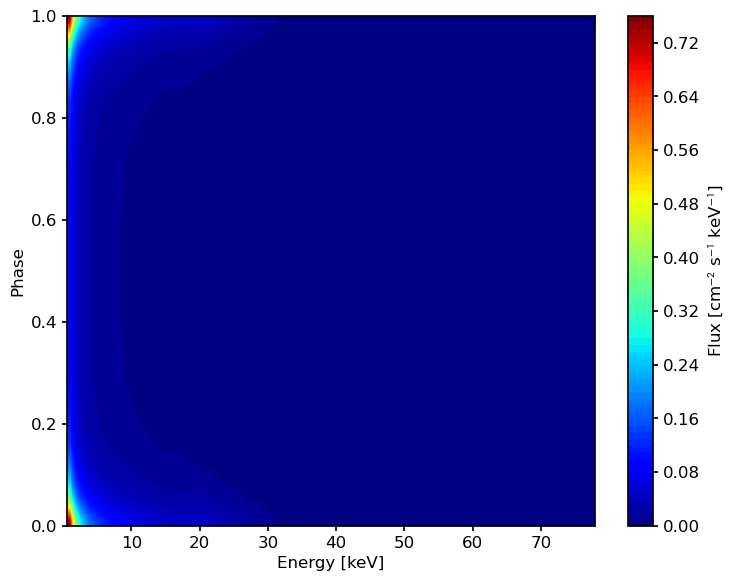

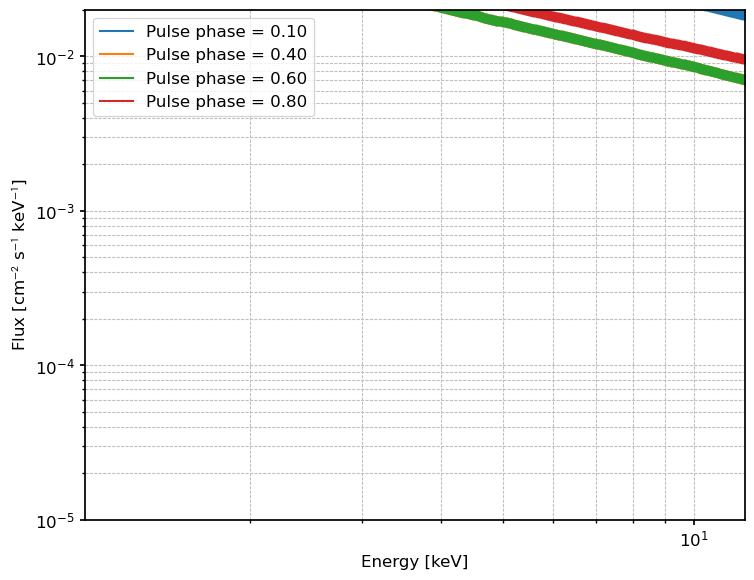

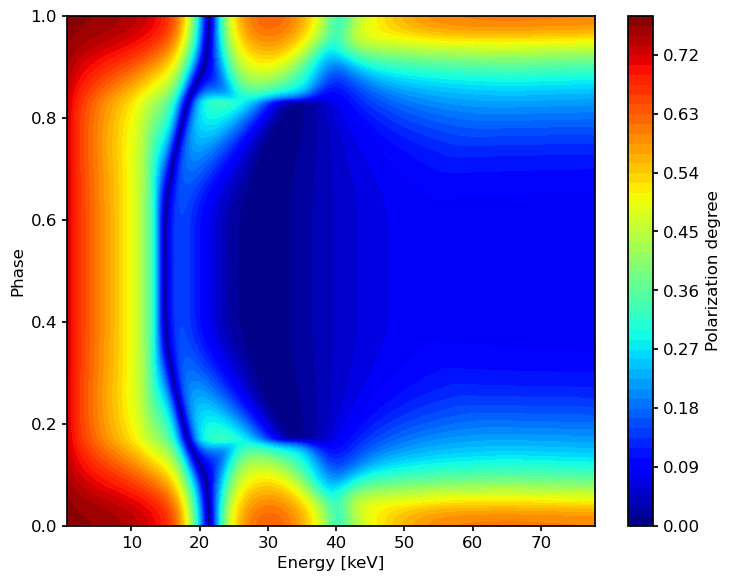

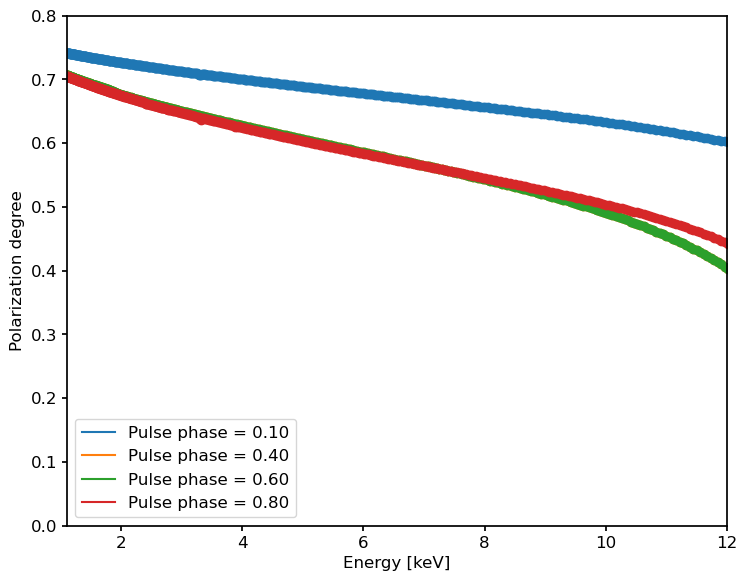

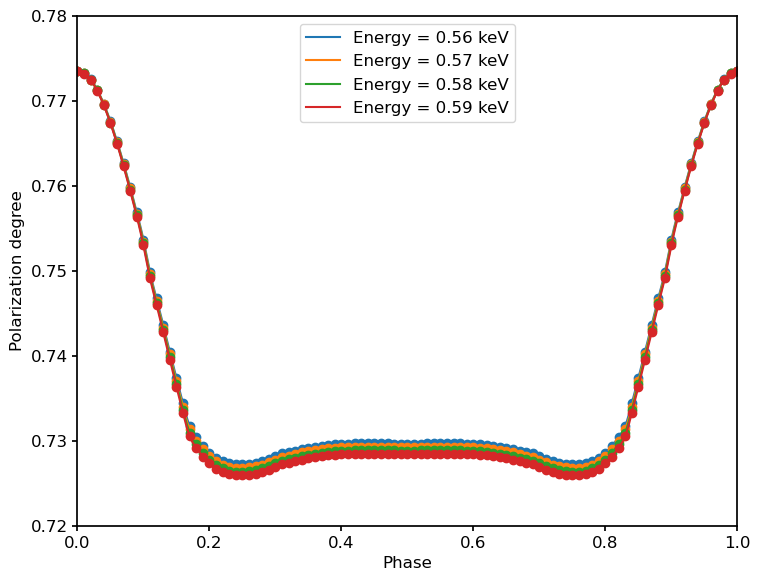

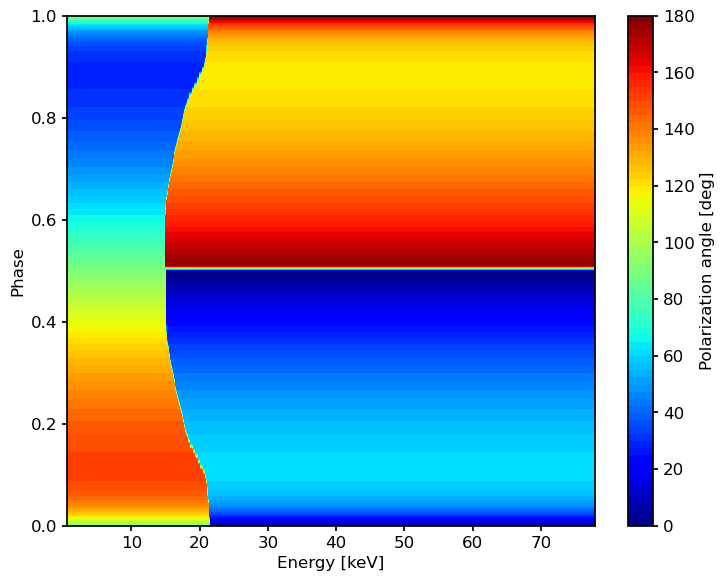

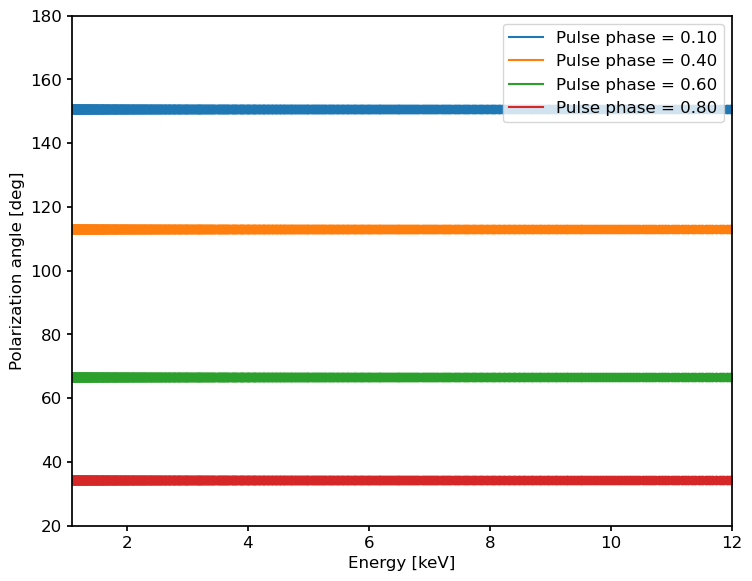

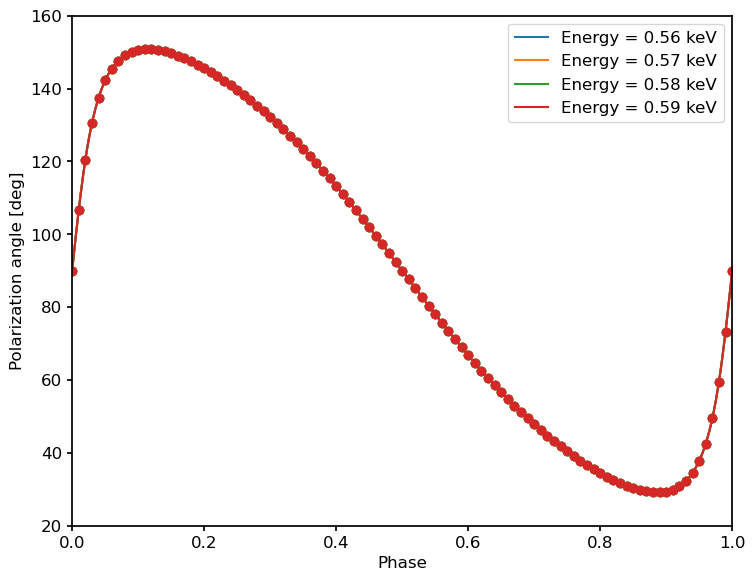

In [3]:
print(magnetar.filename)
magnetar.display()

## Phase-Averaged Spectrum

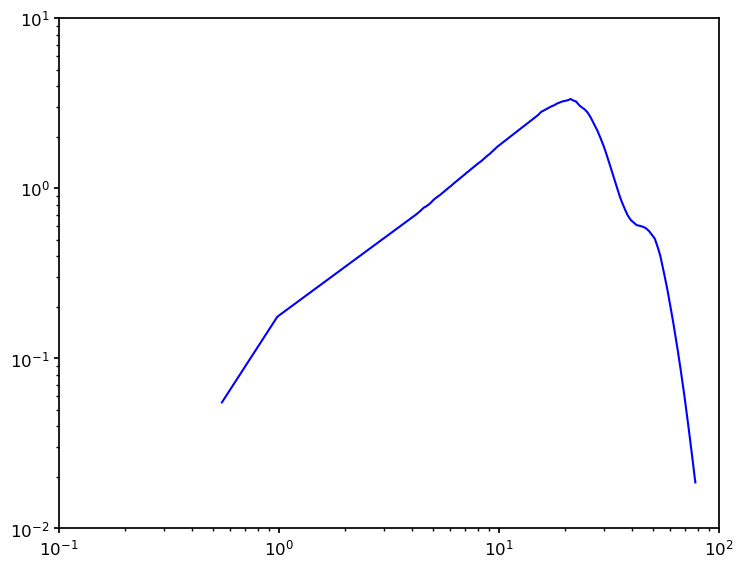

In [4]:
mfl=numpy.mean(magnetar.flux,axis=-1)
plt.loglog(magnetar.enerlist,magnetar.enerlist**2*mfl,'b')


## Phase-Averaged Q/I

Using the instantaneous projection of the magnetic moment into the sky as the basis


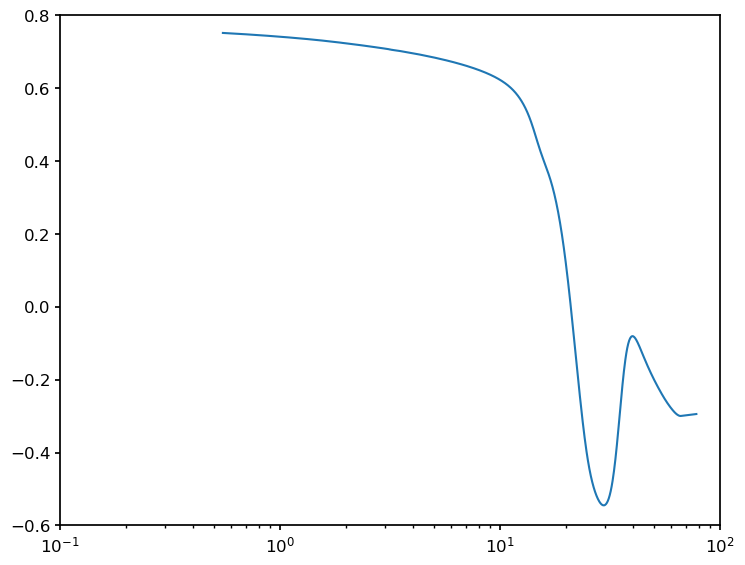

In [5]:
_t=numpy.linspace(0,1,101)
_tt,_ee=numpy.meshgrid(_t,magnetar.enerlist)
qfl=numpy.mean(magnetar.flux*magnetar.ratio_inclination(_ee,magnetar.inclination(_tt)),axis=-1)
plt.semilogx(magnetar.enerlist,qfl/mfl)


## Configure the simulation.

In [6]:
head,cfile=os.path.split(magnetar.__file__)
CFG_FILE = os.path.join(IXPEOBSSIM_CONFIG, cfile)
modulename=os.path.splitext(cfile)[0]
OUT_FILE_PATH_BASE = os.path.join(IXPEOBSSIM_DATA, modulename)
EVT_FILE_PATH = '%s.fits' % OUT_FILE_PATH_BASE
SIM_DURATION = 100000.
OUTPUT_FOLDER = os.path.join(IXPEOBSSIM_DOC, 'figures', 'showcase')


## Clean up

Remove output files from a previous run.

In [7]:
os.system('rm {}*'.format(OUT_FILE_PATH_BASE))

0

## Perform the simulation

In [8]:
EVT_FILE_PATH = pipeline.xpobssim(configfile=CFG_FILE, duration=SIM_DURATION)

>>> Setting output file base name to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model...


>>> Setting up the source model...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



>>> ROI centered at (26.5934, 61.7509):
- xPeriodicPointSource "4U 0142+61" (id = 0)
    Galactic column density: 0.000e+00 cm^{-2}
    Redshift: 0.000
    Unabsorbed flux @ t = 0: 6.851e-09 erg/cm2/s (342.56 mcrab)
    Position: RA = 26.5933625 deg, Dec = 61.7508861111 deg
    Ephemeris: t0 = 0.0 s, nu0 = 0.11509211554 Hz, nudot = -2.6783806e-14 Hz/s, nuddot = 0.0 Hz/s^2


>>> Done [t0 + 2.026 s].


>>> Calculating good time intervals...


>>> Running custom skyfield loader...


>>> Using builtin timescale ancillary data (from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/instrument/data)...


>>> Loading SAA boundaries from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/instrument/data/saa_polygon.txt...


>>> IXPE catalog #0 epoch 2020-10-02 00:30:09 UTC


>>> Loading planet ephemeris from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/instrument/data/de430t_2000_2040.bsp...


>>> List of good time intervals (100000.000 s total over 100000.000 s span):
[  1] (167270400.000--167370400.000) or (0.000--100000.000)


>>> Setting the random seed to 4232468801...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu1stdcutv005.arf...


Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu1stdcutv005.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  SPECRESP      1 BinTableHDU     43   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1stdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.606924', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu1vignstdcutv005.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.606924', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu1vignstdcutv005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu1vignstdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.617896', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu1stdcutv005.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.617896', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu1stdcutv005.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   ()      
  1  MATRIX        1 BinTableHDU     51   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     46   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu1stdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.625661', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu1psfstdcutv005.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.625661', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu1psfstdcutv005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu1psfstdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.863790', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.863790', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  SPECRESP      1 BinTableHDU     42   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.835860', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 2.968 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

>>> Creating the count spectrum...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.835860', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 410150 events...


>>> Filtering 410150 event times according to the GTIs...


>>> Done, 410150 entries remaining.


>>> Calculating the dithering angular offset...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 410150/410150 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.113 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 410150/410150 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.027 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 407013/410150 (99.24%) events remaining, deadtime correction 0.992.


>>> Running time for apply_dead_time(): 0.207 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   407013R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   407013R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


>>> Done for detector unit # 1 [t0 + 9.376 s].


>>> Setting the random seed to 4232468802...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu2stdcutv005.arf...


Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu2stdcutv005.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  SPECRESP      1 BinTableHDU     43   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2stdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.874205', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu2vignstdcutv005.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.874205', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu2vignstdcutv005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu2vignstdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.884794', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu2stdcutv005.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.884794', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu2stdcutv005.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   ()      
  1  MATRIX        1 BinTableHDU     51   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     46   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu2stdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.892081', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu2psfstdcutv005.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:16.892081', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu2psfstdcutv005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu2psfstdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.091343', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.091343', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  SPECRESP      1 BinTableHDU     42   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.064597', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 10.274 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

>>> Creating the count spectrum...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.064597', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 411216 events...


>>> Filtering 411216 event times according to the GTIs...


>>> Done, 411216 entries remaining.


>>> Calculating the dithering angular offset...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 411216/411216 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.108 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 411216/411216 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.026 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 407942/411216 (99.20%) events remaining, deadtime correction 0.992.


>>> Running time for apply_dead_time(): 0.275 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   407942R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   407942R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


>>> Done for detector unit # 2 [t0 + 16.747 s].


>>> Setting the random seed to 4232468803...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu3stdcutv005.arf...


Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu3stdcutv005.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  SPECRESP      1 BinTableHDU     43   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3stdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.101503', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu3vignstdcutv005.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.101503', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu3vignstdcutv005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu3vignstdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.111650', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu3stdcutv005.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.111650', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu3stdcutv005.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   ()      
  1  MATRIX        1 BinTableHDU     51   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     46   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu3stdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.119644', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu3psfstdcutv005.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.119644', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu3psfstdcutv005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu3psfstdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.316280', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.316280', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  SPECRESP      1 BinTableHDU     42   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv005 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.290507', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 17.667 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

>>> Creating the count spectrum...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '11.2.1', 'DATE': '2020-09-02T19:24:17.290507', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 410448 events...


>>> Filtering 410448 event times according to the GTIs...


>>> Done, 410448 entries remaining.


>>> Calculating the dithering angular offset...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 410448/410448 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.103 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 410448/410448 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.025 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 407268/410448 (99.23%) events remaining, deadtime correction 0.992.


>>> Running time for apply_dead_time(): 0.200 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   407268R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   407268R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Done for detector unit # 3 [t0 + 23.866 s].


>>> All done [t0 + 23.866 s]!


In [9]:
EVT_FILE_PATH

['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits']

# Basic Analysis

## Generate a count map and plot it

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   407013R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits...


>>> Setting xref to 26.5933625...


>>> Setting yref to 61.7508861111...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     53   (200, 200)   float64   


>>> Writing CMAP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   407942R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits...


>>> Setting xref to 26.5933625...


>>> Setting yref to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     53   (200, 200)   float64   


>>> Writing CMAP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   407268R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits...


>>> Setting xref to 26.5933625...


>>> Setting yref to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     53   (200, 200)   float64   


>>> Writing CMAP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


/projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/core/fitsio.py:458: RuntimeWarning: divide by zero encountered in double_scalars
  log_a = kwargs.get('vmax', data.max()) / kwargs.get('vmin', data.min())


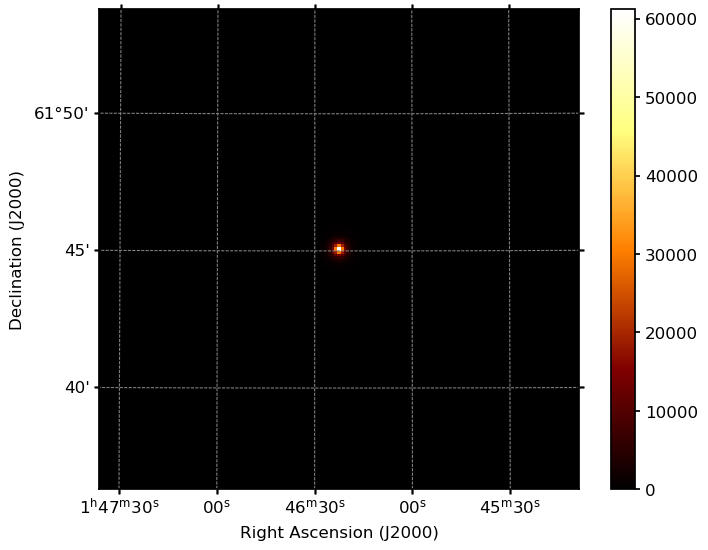

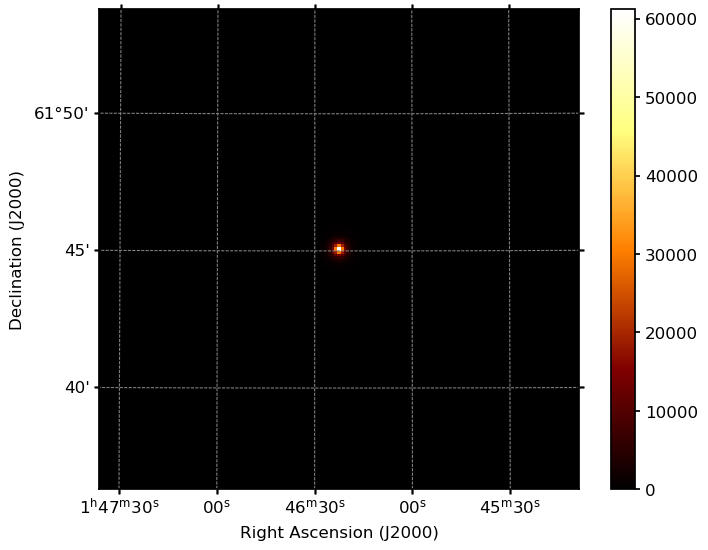

In [10]:

from ixpeobssim.evt.binning import xBinnedMap
 
cmap_file_list=pipeline.xpbin(*EVT_FILE_PATH, algorithm='CMAP')
count_map = xBinnedMap.from_file_list(cmap_file_list)
count_map.plot()


## Generate a light curve

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   407013R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits...


>>> Setting tmin to 167270400.0...


>>> Setting tmax to 167370400.0...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  RATE          1 xBinTableHDULC     39   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Writing LC binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   407942R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits...


>>> Setting tmin to 167270400.0...


>>> Setting tmax to 167370400.0...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  RATE          1 xBinTableHDULC     39   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Writing LC binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   407268R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits...


>>> Setting tmin to 167270400.0...


>>> Setting tmax to 167370400.0...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  RATE          1 xBinTableHDULC     39   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Writing LC binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  RATE          1 BinTableHDU     39   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  RATE          1 BinTableHDU     39   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  RATE          1 BinTableHDU     39   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


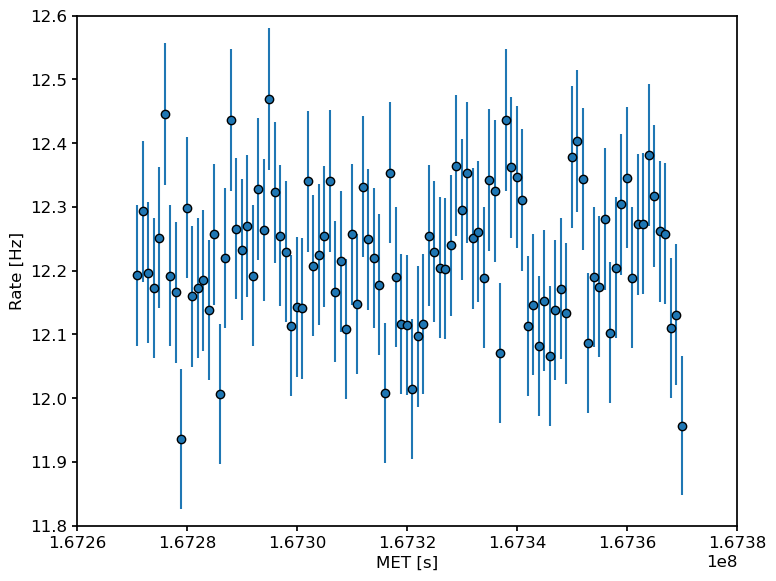

In [11]:
from ixpeobssim.evt.binning import xBinnedLightCurve

lc_file_list=pipeline.xpbin(*EVT_FILE_PATH, algorithm='LC')
count_lc = xBinnedLightCurve.from_file_list(lc_file_list)
count_lc.plot()

## Generate a spectrum

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   407013R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     53   275R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   407942R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     53   275R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   407268R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     53   275R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  SPECTRUM      1 BinTableHDU     53   275R x 3C   ['J', 'E', 'E']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  SPECTRUM      1 BinTableHDU     53   275R x 3C   ['J', 'E', 'E']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  SPECTRUM      1 BinTableHDU     53   275R x 3C   ['J', 'E', 'E']   


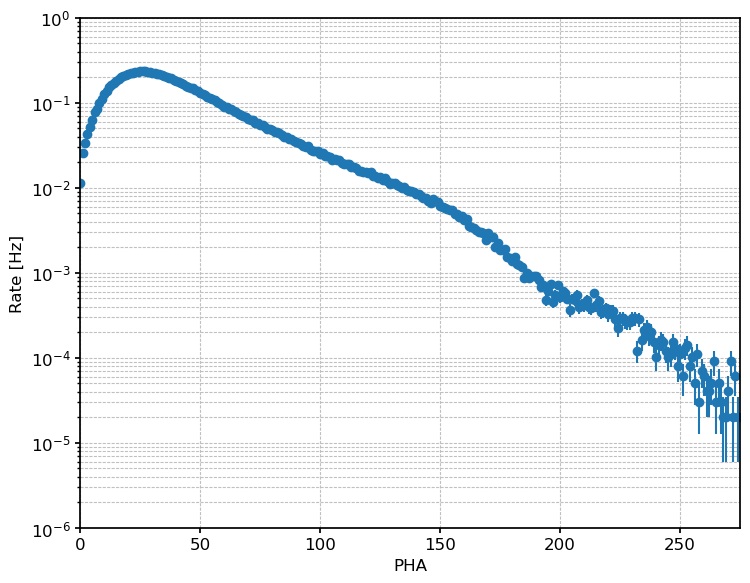

In [12]:
from ixpeobssim.evt.binning import xBinnedCountSpectrum

pha1_file_path = pipeline.xpbin(*EVT_FILE_PATH, algorithm='PHA1')
pha1_data = xBinnedCountSpectrum.from_file_list(pha1_file_path)
pha1_data.plot()


# Pulse Folding

## Calculate phases

In [13]:
folded_EVT_FILE_PATH=pipeline.xptimetophase(*EVT_FILE_PATH, configfile=CFG_FILE,suffix='folded')


    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



>>> Opening "/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits"...


>>> Creating phase column...


>>> Writing to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Opening "/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits"...


>>> Creating phase column...


>>> Writing to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Opening "/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits"...


>>> Creating phase column...


>>> Writing to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Done!


## Plot the pulse profile

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  RATE          1 xBinTableHDUPP     39   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing PP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  RATE          1 xBinTableHDUPP     39   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing PP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  RATE          1 xBinTableHDUPP     39   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing PP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  RATE          1 BinTableHDU     39   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  RATE          1 BinTableHDU     39   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  RATE          1 BinTableHDU     39   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


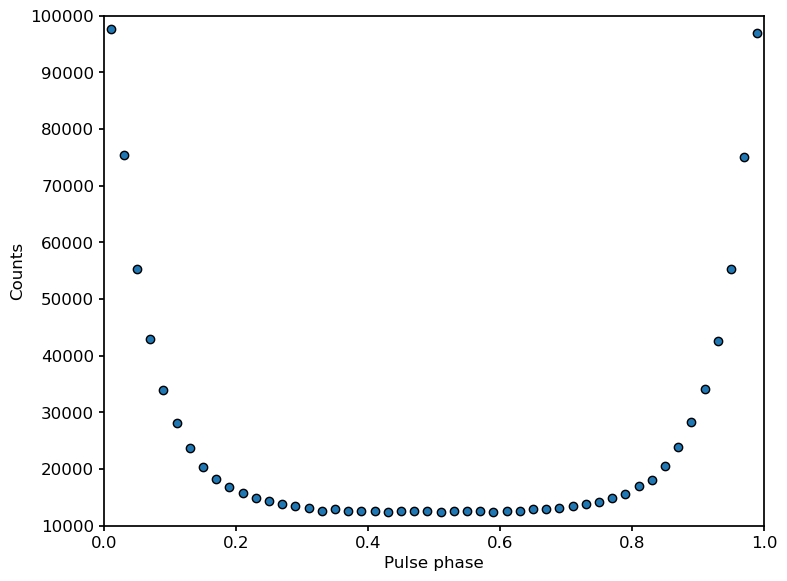

In [14]:
from ixpeobssim.evt.binning import xBinnedPulseProfile

prof_file_path = pipeline.xpbin(*folded_EVT_FILE_PATH, algorithm='PP')
prof_data = xBinnedPulseProfile.from_file_list(prof_file_path)
prof_data.plot()


# Look at polarization    

## Divide events in phase bins

In [15]:
from ixpeobssim.utils.misc import pairwise_enum
PHASE_BINNING = numpy.concatenate((numpy.linspace(0,0.2,11),numpy.linspace(0.3,0.7,11),numpy.linspace(0.8,1.0,11)))

for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
        pipeline.xpselect(*folded_EVT_FILE_PATH, phasemin=min_, phasemax=max_,
                          suffix=pipeline.suffix('phase', i),overwrite=True)



>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits'}...


>>> Done, 32616 events out of 407013 left.


>>> Filtering in place event file (32616 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32616R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   32616R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits'}...


>>> Done, 32427 events out of 407942 left.


>>> Filtering in place event file (32427 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32427R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   32427R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits'}...


>>> Done, 32640 events out of 407268 left.


>>> Filtering in place event file (32640 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32640R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   32640R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits'}...


>>> Done, 25117 events out of 407013 left.


>>> Filtering in place event file (25117 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25117R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   25117R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits'}...


>>> Done, 25271 events out of 407942 left.


>>> Filtering in place event file (25271 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25271R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   25271R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits'}...


>>> Done, 25041 events out of 407268 left.


>>> Filtering in place event file (25041 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25041R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   25041R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0002', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.04, 'phasemax': 0.06, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits'}...


>>> Done, 18618 events out of 407013 left.


>>> Filtering in place event file (18618 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18618R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   18618R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0002', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.04, 'phasemax': 0.06, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002.fits'}...


>>> Done, 18496 events out of 407942 left.


>>> Filtering in place event file (18496 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18496R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   18496R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0002', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.04, 'phasemax': 0.06, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002.fits'}...


>>> Done, 18241 events out of 407268 left.


>>> Filtering in place event file (18241 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18241R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   18241R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0003', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.06, 'phasemax': 0.08, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003.fits'}...


>>> Done, 14471 events out of 407013 left.


>>> Filtering in place event file (14471 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14471R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14471R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0003', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.06, 'phasemax': 0.08, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003.fits'}...


>>> Done, 14322 events out of 407942 left.


>>> Filtering in place event file (14322 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14322R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14322R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0003', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.06, 'phasemax': 0.08, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003.fits'}...


>>> Done, 14149 events out of 407268 left.


>>> Filtering in place event file (14149 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14149R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14149R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0004', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.08, 'phasemax': 0.1, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004.fits'}...


>>> Done, 11422 events out of 407013 left.


>>> Filtering in place event file (11422 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11422R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   11422R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0004', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.08, 'phasemax': 0.1, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004.fits'}...


>>> Done, 11216 events out of 407942 left.


>>> Filtering in place event file (11216 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11216R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   11216R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0004', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.08, 'phasemax': 0.1, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004.fits'}...


>>> Done, 11284 events out of 407268 left.


>>> Filtering in place event file (11284 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11284R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   11284R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0005', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.1, 'phasemax': 0.12, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005.fits'}...


>>> Done, 9180 events out of 407013 left.


>>> Filtering in place event file (9180 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9180R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9180R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0005', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.1, 'phasemax': 0.12, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005.fits'}...


>>> Done, 9403 events out of 407942 left.


>>> Filtering in place event file (9403 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9403R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9403R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0005', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.1, 'phasemax': 0.12, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005.fits'}...


>>> Done, 9475 events out of 407268 left.


>>> Filtering in place event file (9475 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9475R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9475R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0006', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.12, 'phasemax': 0.14, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006.fits'}...


>>> Done, 7921 events out of 407013 left.


>>> Filtering in place event file (7921 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7921R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7921R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0006', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.12, 'phasemax': 0.14, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006.fits'}...


>>> Done, 7946 events out of 407942 left.


>>> Filtering in place event file (7946 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7946R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7946R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0006', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.12, 'phasemax': 0.14, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006.fits'}...


>>> Done, 7918 events out of 407268 left.


>>> Filtering in place event file (7918 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7918R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7918R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0007', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.14, 'phasemax': 0.16, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007.fits'}...


>>> Done, 6783 events out of 407013 left.


>>> Filtering in place event file (6783 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6783R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6783R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0007', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.14, 'phasemax': 0.16, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007.fits'}...


>>> Done, 6882 events out of 407942 left.


>>> Filtering in place event file (6882 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6882R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6882R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0007', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.14, 'phasemax': 0.16, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007.fits'}...


>>> Done, 6694 events out of 407268 left.


>>> Filtering in place event file (6694 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6694R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6694R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0008', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.16, 'phasemax': 0.18, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008.fits'}...


>>> Done, 6043 events out of 407013 left.


>>> Filtering in place event file (6043 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6043R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6043R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0008', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.16, 'phasemax': 0.18, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008.fits'}...


>>> Done, 6139 events out of 407942 left.


>>> Filtering in place event file (6139 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6139R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6139R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0008', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.16, 'phasemax': 0.18, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008.fits'}...


>>> Done, 5984 events out of 407268 left.


>>> Filtering in place event file (5984 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5984R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5984R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0009', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.18, 'phasemax': 0.2, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009.fits'}...


>>> Done, 5547 events out of 407013 left.


>>> Filtering in place event file (5547 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5547R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5547R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0009', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.18, 'phasemax': 0.2, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009.fits'}...


>>> Done, 5529 events out of 407942 left.


>>> Filtering in place event file (5529 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5529R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5529R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0009', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.18, 'phasemax': 0.2, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009.fits'}...


>>> Done, 5790 events out of 407268 left.


>>> Filtering in place event file (5790 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5790R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5790R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0010', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.2, 'phasemax': 0.3, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010.fits'}...


>>> Done, 24103 events out of 407013 left.


>>> Filtering in place event file (24103 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24103R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   24103R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0010', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.2, 'phasemax': 0.3, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits'}...


>>> Done, 24065 events out of 407942 left.


>>> Filtering in place event file (24065 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24065R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   24065R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0010', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.2, 'phasemax': 0.3, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits'}...


>>> Done, 24253 events out of 407268 left.


>>> Filtering in place event file (24253 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24253R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   24253R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits'}...


>>> Done, 8592 events out of 407013 left.


>>> Filtering in place event file (8592 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8592R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8592R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits'}...


>>> Done, 8461 events out of 407942 left.


>>> Filtering in place event file (8461 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8461R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8461R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits'}...


>>> Done, 8584 events out of 407268 left.


>>> Filtering in place event file (8584 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8584R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8584R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits'}...


>>> Done, 8427 events out of 407013 left.


>>> Filtering in place event file (8427 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8427R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8427R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits'}...


>>> Done, 8722 events out of 407942 left.


>>> Filtering in place event file (8722 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8722R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8722R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits'}...


>>> Done, 8419 events out of 407268 left.


>>> Filtering in place event file (8419 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8419R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8419R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits'}...


>>> Done, 8408 events out of 407013 left.


>>> Filtering in place event file (8408 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8408R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8408R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits'}...


>>> Done, 8361 events out of 407942 left.


>>> Filtering in place event file (8361 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8361R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8361R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits'}...


>>> Done, 8459 events out of 407268 left.


>>> Filtering in place event file (8459 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8459R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8459R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits'}...


>>> Done, 8390 events out of 407013 left.


>>> Filtering in place event file (8390 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8390R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8390R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits'}...


>>> Done, 8317 events out of 407942 left.


>>> Filtering in place event file (8317 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8317R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8317R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits'}...


>>> Done, 8380 events out of 407268 left.


>>> Filtering in place event file (8380 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8380R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8380R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits'}...


>>> Done, 8342 events out of 407013 left.


>>> Filtering in place event file (8342 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8342R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8342R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits'}...


>>> Done, 8405 events out of 407942 left.


>>> Filtering in place event file (8405 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8405R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8405R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits'}...


>>> Done, 8427 events out of 407268 left.


>>> Filtering in place event file (8427 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8427R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8427R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits'}...


>>> Done, 8403 events out of 407013 left.


>>> Filtering in place event file (8403 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8403R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8403R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits'}...


>>> Done, 8467 events out of 407942 left.


>>> Filtering in place event file (8467 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8467R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8467R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits'}...


>>> Done, 8231 events out of 407268 left.


>>> Filtering in place event file (8231 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8231R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8231R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits'}...


>>> Done, 8400 events out of 407013 left.


>>> Filtering in place event file (8400 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8400R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8400R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits'}...


>>> Done, 8439 events out of 407942 left.


>>> Filtering in place event file (8439 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8439R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8439R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits'}...


>>> Done, 8465 events out of 407268 left.


>>> Filtering in place event file (8465 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8465R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8465R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits'}...


>>> Done, 8320 events out of 407013 left.


>>> Filtering in place event file (8320 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8320R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8320R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits'}...


>>> Done, 8257 events out of 407942 left.


>>> Filtering in place event file (8257 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8257R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8257R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits'}...


>>> Done, 8330 events out of 407268 left.


>>> Filtering in place event file (8330 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8330R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8330R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits'}...


>>> Done, 8389 events out of 407013 left.


>>> Filtering in place event file (8389 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8389R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8389R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits'}...


>>> Done, 8526 events out of 407942 left.


>>> Filtering in place event file (8526 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8526R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8526R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits'}...


>>> Done, 8508 events out of 407268 left.


>>> Filtering in place event file (8508 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8508R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8508R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits'}...


>>> Done, 8639 events out of 407013 left.


>>> Filtering in place event file (8639 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8639R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8639R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits'}...


>>> Done, 8695 events out of 407942 left.


>>> Filtering in place event file (8695 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8695R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8695R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits'}...


>>> Done, 8731 events out of 407268 left.


>>> Filtering in place event file (8731 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8731R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8731R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits'}...


>>> Done, 24013 events out of 407013 left.


>>> Filtering in place event file (24013 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24013R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   24013R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits'}...


>>> Done, 24031 events out of 407942 left.


>>> Filtering in place event file (24031 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24031R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   24031R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits'}...


>>> Done, 23997 events out of 407268 left.


>>> Filtering in place event file (23997 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   23997R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   23997R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits'}...


>>> Done, 5680 events out of 407013 left.


>>> Filtering in place event file (5680 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5680R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5680R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits'}...


>>> Done, 5646 events out of 407942 left.


>>> Filtering in place event file (5646 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5646R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5646R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits'}...


>>> Done, 5652 events out of 407268 left.


>>> Filtering in place event file (5652 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5652R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5652R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits'}...


>>> Done, 6003 events out of 407013 left.


>>> Filtering in place event file (6003 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6003R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6003R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits'}...


>>> Done, 6098 events out of 407942 left.


>>> Filtering in place event file (6098 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6098R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6098R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits'}...


>>> Done, 6004 events out of 407268 left.


>>> Filtering in place event file (6004 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6004R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6004R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits'}...


>>> Done, 6747 events out of 407013 left.


>>> Filtering in place event file (6747 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6747R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6747R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits'}...


>>> Done, 6948 events out of 407942 left.


>>> Filtering in place event file (6948 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6948R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6948R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits'}...


>>> Done, 6887 events out of 407268 left.


>>> Filtering in place event file (6887 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6887R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6887R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits'}...


>>> Done, 7882 events out of 407013 left.


>>> Filtering in place event file (7882 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7882R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7882R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits'}...


>>> Done, 8114 events out of 407942 left.


>>> Filtering in place event file (8114 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8114R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8114R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits'}...


>>> Done, 7811 events out of 407268 left.


>>> Filtering in place event file (7811 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7811R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7811R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits'}...


>>> Done, 9388 events out of 407013 left.


>>> Filtering in place event file (9388 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9388R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9388R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits'}...


>>> Done, 9498 events out of 407942 left.


>>> Filtering in place event file (9498 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9498R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9498R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits'}...


>>> Done, 9334 events out of 407268 left.


>>> Filtering in place event file (9334 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9334R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9334R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits'}...


>>> Done, 11211 events out of 407013 left.


>>> Filtering in place event file (11211 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11211R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   11211R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits'}...


>>> Done, 11525 events out of 407942 left.


>>> Filtering in place event file (11525 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11525R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   11525R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits'}...


>>> Done, 11330 events out of 407268 left.


>>> Filtering in place event file (11330 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11330R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   11330R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits'}...


>>> Done, 14040 events out of 407013 left.


>>> Filtering in place event file (14040 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14040R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14040R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits'}...


>>> Done, 14212 events out of 407942 left.


>>> Filtering in place event file (14212 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14212R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14212R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits'}...


>>> Done, 14430 events out of 407268 left.


>>> Filtering in place event file (14430 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14430R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14430R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits'}...


>>> Done, 18562 events out of 407013 left.


>>> Filtering in place event file (18562 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18562R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   18562R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits'}...


>>> Done, 18238 events out of 407942 left.


>>> Filtering in place event file (18238 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18238R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   18238R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits'}...


>>> Done, 18416 events out of 407268 left.


>>> Filtering in place event file (18416 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18416R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   18416R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits'}...


>>> Done, 25054 events out of 407013 left.


>>> Filtering in place event file (25054 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25054R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   25054R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits'}...


>>> Done, 24818 events out of 407942 left.


>>> Filtering in place event file (24818 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24818R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   24818R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits'}...


>>> Done, 25140 events out of 407268 left.


>>> Filtering in place event file (25140 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25140R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   25140R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits'}...


>>> Done, 32301 events out of 407013 left.


>>> Filtering in place event file (32301 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32301R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   32301R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits'}...


>>> Done, 32468 events out of 407942 left.


>>> Filtering in place event file (32468 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32468R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   32468R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits'}...


>>> Done, 32264 events out of 407268 left.


>>> Filtering in place event file (32264 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32264R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   32264R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


## Generate MCUBE files

This contain the Stokes parameters for each energy and phase bin.

In [16]:
ENERGY_BINNING = numpy.array([2., 4., 8.])


for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d.fits'% (s[:-5],i)   for s in folded_EVT_FILE_PATH]
    pipeline.xpbin(*file_list, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING,overwrite=True)



>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32616R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   32616R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32427R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   32427R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32640R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   32640R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25117R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   25117R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25271R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   25271R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25041R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   25041R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18618R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   18618R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18496R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   18496R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18241R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   18241R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14471R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14471R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14322R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14322R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14149R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14149R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11422R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   11422R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11216R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   11216R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11284R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   11284R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9180R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9180R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9403R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9403R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9475R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9475R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7921R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7921R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7946R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7946R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7918R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7918R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6783R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6783R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6694R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6694R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6043R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6043R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6139R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6139R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5984R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5984R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5547R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5547R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5529R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5529R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5790R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5790R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24103R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   24103R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24065R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   24065R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24253R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   24253R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8592R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8592R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8461R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8461R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8584R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8584R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8427R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8427R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8722R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8722R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8419R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8419R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8408R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8408R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8361R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8361R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8459R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8459R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8390R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8390R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8317R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8317R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8380R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8380R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8342R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8342R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8405R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8405R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8427R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8427R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8403R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8403R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8467R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8467R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8231R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8231R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8400R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8400R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8439R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8439R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8465R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8465R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8320R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8320R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8257R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8257R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8330R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8330R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8389R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8389R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8526R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8526R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8508R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8508R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8639R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8639R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8695R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8695R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8731R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8731R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   24013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24031R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   24031R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   23997R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   23997R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5680R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5680R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5646R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5646R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5652R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5652R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6003R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6003R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6098R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6098R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6004R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6004R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6747R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6747R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6948R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6948R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6887R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6887R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8114R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8114R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7811R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7811R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9388R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9388R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9498R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9498R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9334R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9334R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11211R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   11211R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11525R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   11525R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11330R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   11330R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14040R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14040R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14212R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14212R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14430R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14430R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18562R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   18562R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18238R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   18238R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18416R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   18416R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25054R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   25054R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24818R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   24818R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25140R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   25140R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32301R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   32301R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32468R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   32468R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32264R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   32264R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


## Load the MCUBE data into Python

In [17]:
from ixpeobssim.evt.binning import xEventBinningBase, xBinnedModulationCube  

phase = numpy.linspace(0., 1., 100)
phase_bins = xEventBinningBase.bin_centers(PHASE_BINNING)
shape = (len(ENERGY_BINNING) - 1, len(PHASE_BINNING) - 1)
pol_deg = numpy.zeros(shape)
pol_deg_err = numpy.zeros(shape)
pol_ang = numpy.zeros(shape)
pol_ang_err = numpy.zeros(shape)
emean = numpy.zeros(shape)
for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d_mcube.fits'% (s[:-5],i)   for s in folded_EVT_FILE_PATH]

    mcube = xBinnedModulationCube.from_file_list(file_list)
    pol_deg[:,i] = mcube.POL_DEG
    pol_deg_err[:,i] = mcube.POL_DEG_ERR
    pol_ang[:,i] = mcube.POL_ANG
    pol_ang_err[:,i] = mcube.POL_ANG_ERR
    emean[:,i] = mcube.ENERGY_MEAN


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


## Plot the polarization degree

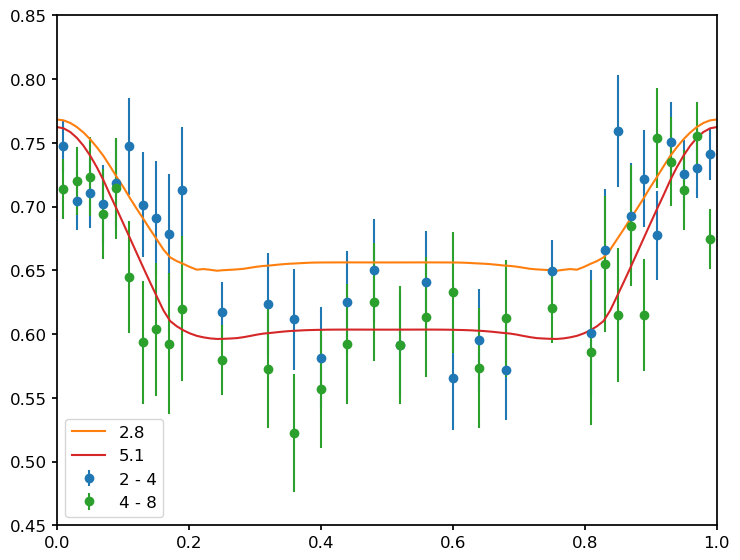

In [18]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, pol_deg[i,:], pol_deg_err[i,:], fmt='o',
                         label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    plt.plot(phase, magnetar.pol_deg(energy, phase),label='%2.1f' % energy        )
plt.legend()

## Plot the polarization angle

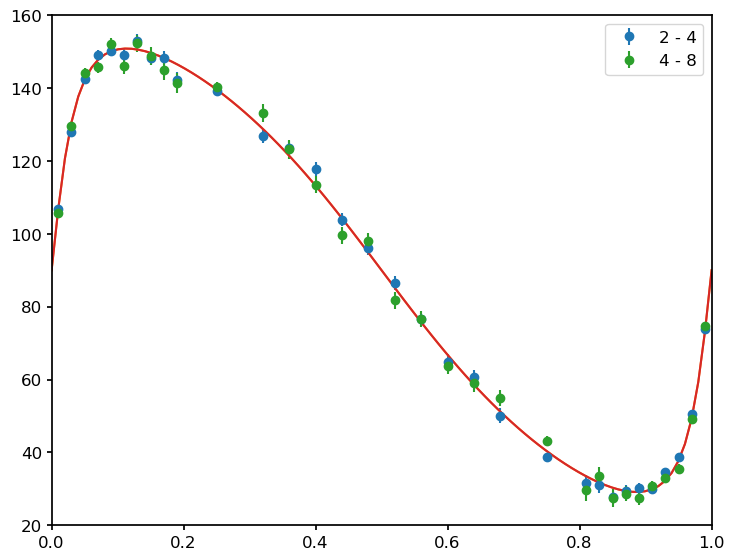

In [19]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, numpy.mod(pol_ang[i,:],180), pol_ang_err[i,:], fmt='o',
                     label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    plt.plot(phase, numpy.degrees(magnetar.pol_ang(energy, phase) )    )
plt.legend()

# Look at phase-averaged polarization

## Create an MCUBE with finer energy bins

In [20]:
ENERGY_BINNING2 = numpy.array([2., 3., 4., 6., 8.])

pipeline.xpbin(*folded_EVT_FILE_PATH, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING2,overwrite=True)

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits']

## Load the MCUBE data into Python

In [21]:
file_list = ['%s_mcube.fits'% (s[:-5],)   for s in folded_EVT_FILE_PATH]

mcube2 = xBinnedModulationCube.from_file_list(file_list)
pol_deg2 = mcube2.POL_DEG
pol_deg2_err= mcube2.POL_DEG_ERR
pol_ang2 = mcube2.POL_ANG
pol_ang2_err = mcube2.POL_ANG_ERR
emean2 = mcube2.ENERGY_MEAN

>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


## Plot angle vs. energy

<ErrorbarContainer object of 3 artists>

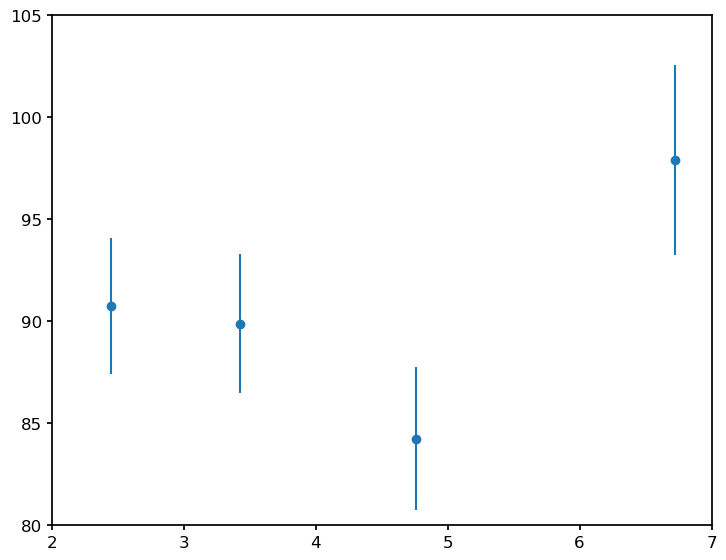

In [22]:
plt.errorbar(emean2, numpy.mod(pol_ang2,180), pol_ang2_err, fmt='o') 

## Plot polarization degree vs energy

<ErrorbarContainer object of 3 artists>

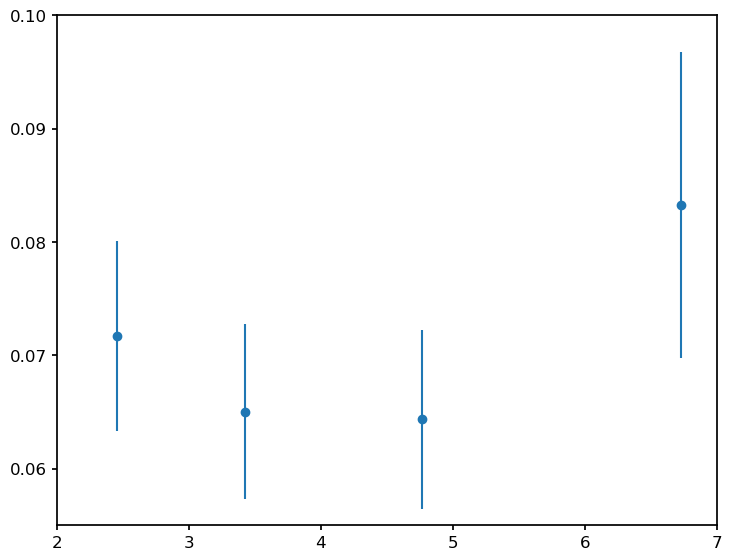

In [23]:
plt.errorbar(emean2, pol_deg2, pol_deg2_err, fmt='o')

# Polarization Relative to Model

Let's calculate the angle between the electric vector measured for each photon and the model value of the polarization at the phase of arrival of the photon

## Load fits libary

In [24]:
from astropy.io import fits

## Rotate the polarization direction of each photon

Each photon has a value of `PHI`, the polarization angle relative to North and the corresponding `U` and `Q` values.  We replace `PHI` with the difference between the observed angle and an angle from the model at the `PHASE` of arrival of the photon.  We also replace `U` and `Q`.

The FITS file does not contain the energy explicitly but one could translate `PHA` values to energy to rotate relative to the model at a particular energy.

In [25]:
rotated_EVT_FILE_PATH=[]
for f in folded_EVT_FILE_PATH:
    fnew=f.replace('folded','rotated')
    with fits.open(f) as hdul:
        hdul[1].data['PHI']=hdul[1].data['PHI']-magnetar.pol_ang(2.4, hdul[1].data['PHASE'])
        hdul[1].data['PHE_U']= 2 * numpy.sin(2 * hdul[1].data['PHI'])  
        hdul[1].data['PHE_Q']= 2 * numpy.cos(2 * hdul[1].data['PHI'])  
        hdul.writeto(fnew)
        rotated_EVT_FILE_PATH.append(fnew)
print(rotated_EVT_FILE_PATH)

['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits']


## Divide rotated events in phase bins

In [26]:

PHASE_BINNING = numpy.concatenate((numpy.linspace(0,0.2,11),numpy.linspace(0.3,0.7,11),numpy.linspace(0.8,1.0,11)))

for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
        pipeline.xpselect(*rotated_EVT_FILE_PATH, phasemin=min_, phasemax=max_,
                          suffix=pipeline.suffix('phase', i),overwrite=True)

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000.fits'}...


>>> Done, 32616 events out of 407013 left.


>>> Filtering in place event file (32616 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32616R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   32616R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000.fits'}...


>>> Done, 32427 events out of 407942 left.


>>> Filtering in place event file (32427 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32427R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   32427R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000.fits'}...


>>> Done, 32640 events out of 407268 left.


>>> Filtering in place event file (32640 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32640R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   32640R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001.fits'}...


>>> Done, 25117 events out of 407013 left.


>>> Filtering in place event file (25117 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25117R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   25117R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001.fits'}...


>>> Done, 25271 events out of 407942 left.


>>> Filtering in place event file (25271 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25271R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   25271R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001.fits'}...


>>> Done, 25041 events out of 407268 left.


>>> Filtering in place event file (25041 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25041R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   25041R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0002', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.04, 'phasemax': 0.06, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002.fits'}...


>>> Done, 18618 events out of 407013 left.


>>> Filtering in place event file (18618 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18618R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   18618R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0002.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0002', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.04, 'phasemax': 0.06, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0002.fits'}...


>>> Done, 18496 events out of 407942 left.


>>> Filtering in place event file (18496 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0002.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18496R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   18496R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0002.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0002', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.04, 'phasemax': 0.06, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0002.fits'}...


>>> Done, 18241 events out of 407268 left.


>>> Filtering in place event file (18241 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0002.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18241R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   18241R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0003.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0003', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.06, 'phasemax': 0.08, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0003.fits'}...


>>> Done, 14471 events out of 407013 left.


>>> Filtering in place event file (14471 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0003.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14471R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14471R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0003.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0003', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.06, 'phasemax': 0.08, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0003.fits'}...


>>> Done, 14322 events out of 407942 left.


>>> Filtering in place event file (14322 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0003.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14322R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14322R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0003.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0003', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.06, 'phasemax': 0.08, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0003.fits'}...


>>> Done, 14149 events out of 407268 left.


>>> Filtering in place event file (14149 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0003.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14149R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14149R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0004.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0004', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.08, 'phasemax': 0.1, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0004.fits'}...


>>> Done, 11422 events out of 407013 left.


>>> Filtering in place event file (11422 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0004.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11422R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   11422R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0004.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0004', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.08, 'phasemax': 0.1, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0004.fits'}...


>>> Done, 11216 events out of 407942 left.


>>> Filtering in place event file (11216 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0004.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11216R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   11216R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0004.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0004', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.08, 'phasemax': 0.1, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0004.fits'}...


>>> Done, 11284 events out of 407268 left.


>>> Filtering in place event file (11284 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0004.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11284R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   11284R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0005.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0005', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.1, 'phasemax': 0.12, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0005.fits'}...


>>> Done, 9180 events out of 407013 left.


>>> Filtering in place event file (9180 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0005.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9180R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9180R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0005.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0005', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.1, 'phasemax': 0.12, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0005.fits'}...


>>> Done, 9403 events out of 407942 left.


>>> Filtering in place event file (9403 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0005.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9403R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9403R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0005.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0005', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.1, 'phasemax': 0.12, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0005.fits'}...


>>> Done, 9475 events out of 407268 left.


>>> Filtering in place event file (9475 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0005.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9475R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9475R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0006.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0006', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.12, 'phasemax': 0.14, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0006.fits'}...


>>> Done, 7921 events out of 407013 left.


>>> Filtering in place event file (7921 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0006.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7921R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7921R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0006.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0006', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.12, 'phasemax': 0.14, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0006.fits'}...


>>> Done, 7946 events out of 407942 left.


>>> Filtering in place event file (7946 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0006.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7946R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7946R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0006.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0006', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.12, 'phasemax': 0.14, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0006.fits'}...


>>> Done, 7918 events out of 407268 left.


>>> Filtering in place event file (7918 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0006.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7918R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7918R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0007.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0007', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.14, 'phasemax': 0.16, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0007.fits'}...


>>> Done, 6783 events out of 407013 left.


>>> Filtering in place event file (6783 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0007.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6783R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6783R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0007.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0007', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.14, 'phasemax': 0.16, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0007.fits'}...


>>> Done, 6882 events out of 407942 left.


>>> Filtering in place event file (6882 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0007.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6882R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6882R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0007.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0007', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.14, 'phasemax': 0.16, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0007.fits'}...


>>> Done, 6694 events out of 407268 left.


>>> Filtering in place event file (6694 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0007.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6694R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6694R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0008.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0008', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.16, 'phasemax': 0.18, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0008.fits'}...


>>> Done, 6043 events out of 407013 left.


>>> Filtering in place event file (6043 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0008.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6043R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6043R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0008.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0008', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.16, 'phasemax': 0.18, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0008.fits'}...


>>> Done, 6139 events out of 407942 left.


>>> Filtering in place event file (6139 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0008.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6139R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6139R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0008.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0008', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.16, 'phasemax': 0.18, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0008.fits'}...


>>> Done, 5984 events out of 407268 left.


>>> Filtering in place event file (5984 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0008.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5984R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5984R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0009.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0009', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.18, 'phasemax': 0.2, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0009.fits'}...


>>> Done, 5547 events out of 407013 left.


>>> Filtering in place event file (5547 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0009.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5547R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5547R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0009.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0009', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.18, 'phasemax': 0.2, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0009.fits'}...


>>> Done, 5529 events out of 407942 left.


>>> Filtering in place event file (5529 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0009.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5529R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5529R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0009.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0009', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.18, 'phasemax': 0.2, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0009.fits'}...


>>> Done, 5790 events out of 407268 left.


>>> Filtering in place event file (5790 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0009.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5790R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5790R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0010', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.2, 'phasemax': 0.3, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010.fits'}...


>>> Done, 24103 events out of 407013 left.


>>> Filtering in place event file (24103 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24103R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   24103R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0010', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.2, 'phasemax': 0.3, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010.fits'}...


>>> Done, 24065 events out of 407942 left.


>>> Filtering in place event file (24065 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24065R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   24065R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0010', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.2, 'phasemax': 0.3, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010.fits'}...


>>> Done, 24253 events out of 407268 left.


>>> Filtering in place event file (24253 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24253R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   24253R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011.fits'}...


>>> Done, 8592 events out of 407013 left.


>>> Filtering in place event file (8592 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8592R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8592R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011.fits'}...


>>> Done, 8461 events out of 407942 left.


>>> Filtering in place event file (8461 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8461R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8461R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011.fits'}...


>>> Done, 8584 events out of 407268 left.


>>> Filtering in place event file (8584 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8584R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8584R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012.fits'}...


>>> Done, 8427 events out of 407013 left.


>>> Filtering in place event file (8427 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8427R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8427R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012.fits'}...


>>> Done, 8722 events out of 407942 left.


>>> Filtering in place event file (8722 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8722R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8722R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012.fits'}...


>>> Done, 8419 events out of 407268 left.


>>> Filtering in place event file (8419 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8419R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8419R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013.fits'}...


>>> Done, 8408 events out of 407013 left.


>>> Filtering in place event file (8408 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8408R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8408R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013.fits'}...


>>> Done, 8361 events out of 407942 left.


>>> Filtering in place event file (8361 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8361R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8361R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013.fits'}...


>>> Done, 8459 events out of 407268 left.


>>> Filtering in place event file (8459 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8459R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8459R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014.fits'}...


>>> Done, 8390 events out of 407013 left.


>>> Filtering in place event file (8390 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8390R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8390R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014.fits'}...


>>> Done, 8317 events out of 407942 left.


>>> Filtering in place event file (8317 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8317R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8317R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014.fits'}...


>>> Done, 8380 events out of 407268 left.


>>> Filtering in place event file (8380 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8380R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8380R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015.fits'}...


>>> Done, 8342 events out of 407013 left.


>>> Filtering in place event file (8342 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8342R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8342R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015.fits'}...


>>> Done, 8405 events out of 407942 left.


>>> Filtering in place event file (8405 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8405R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8405R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015.fits'}...


>>> Done, 8427 events out of 407268 left.


>>> Filtering in place event file (8427 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8427R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8427R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016.fits'}...


>>> Done, 8403 events out of 407013 left.


>>> Filtering in place event file (8403 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8403R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8403R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016.fits'}...


>>> Done, 8467 events out of 407942 left.


>>> Filtering in place event file (8467 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8467R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8467R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016.fits'}...


>>> Done, 8231 events out of 407268 left.


>>> Filtering in place event file (8231 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8231R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8231R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017.fits'}...


>>> Done, 8400 events out of 407013 left.


>>> Filtering in place event file (8400 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8400R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8400R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017.fits'}...


>>> Done, 8439 events out of 407942 left.


>>> Filtering in place event file (8439 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8439R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8439R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   

>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017.fits'}...


>>> Done, 8465 events out of 407268 left.


>>> Filtering in place event file (8465 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8465R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8465R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018.fits'}...


>>> Done, 8320 events out of 407013 left.


>>> Filtering in place event file (8320 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8320R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8320R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018.fits'}...


>>> Done, 8257 events out of 407942 left.


>>> Filtering in place event file (8257 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8257R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8257R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018.fits'}...


>>> Done, 8330 events out of 407268 left.


>>> Filtering in place event file (8330 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8330R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8330R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019.fits'}...


>>> Done, 8389 events out of 407013 left.


>>> Filtering in place event file (8389 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8389R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8389R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019.fits'}...


>>> Done, 8526 events out of 407942 left.


>>> Filtering in place event file (8526 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8526R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8526R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019.fits'}...


>>> Done, 8508 events out of 407268 left.


>>> Filtering in place event file (8508 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8508R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8508R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020.fits'}...


>>> Done, 8639 events out of 407013 left.


>>> Filtering in place event file (8639 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8639R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8639R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020.fits'}...


>>> Done, 8695 events out of 407942 left.


>>> Filtering in place event file (8695 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8695R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8695R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020.fits'}...


>>> Done, 8731 events out of 407268 left.


>>> Filtering in place event file (8731 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8731R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8731R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021.fits'}...


>>> Done, 24013 events out of 407013 left.


>>> Filtering in place event file (24013 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24013R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   24013R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021.fits'}...


>>> Done, 24031 events out of 407942 left.


>>> Filtering in place event file (24031 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24031R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   24031R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021.fits'}...


>>> Done, 23997 events out of 407268 left.


>>> Filtering in place event file (23997 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   23997R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   23997R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022.fits'}...


>>> Done, 5680 events out of 407013 left.


>>> Filtering in place event file (5680 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5680R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5680R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022.fits'}...


>>> Done, 5646 events out of 407942 left.


>>> Filtering in place event file (5646 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5646R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5646R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022.fits'}...


>>> Done, 5652 events out of 407268 left.


>>> Filtering in place event file (5652 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5652R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   5652R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023.fits'}...


>>> Done, 6003 events out of 407013 left.


>>> Filtering in place event file (6003 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   6003R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6003R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023.fits'}...


>>> Done, 6098 events out of 407942 left.


>>> Filtering in place event file (6098 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   6098R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6098R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023.fits'}...


>>> Done, 6004 events out of 407268 left.


>>> Filtering in place event file (6004 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   6004R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6004R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024.fits'}...


>>> Done, 6747 events out of 407013 left.


>>> Filtering in place event file (6747 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6747R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6747R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024.fits'}...


>>> Done, 6948 events out of 407942 left.


>>> Filtering in place event file (6948 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6948R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6948R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024.fits'}...


>>> Done, 6887 events out of 407268 left.


>>> Filtering in place event file (6887 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6887R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6887R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025.fits'}...


>>> Done, 7882 events out of 407013 left.


>>> Filtering in place event file (7882 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7882R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7882R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025.fits'}...


>>> Done, 8114 events out of 407942 left.


>>> Filtering in place event file (8114 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8114R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8114R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025.fits'}...


>>> Done, 7811 events out of 407268 left.


>>> Filtering in place event file (7811 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7811R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7811R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026.fits'}...


>>> Done, 9388 events out of 407013 left.


>>> Filtering in place event file (9388 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9388R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9388R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026.fits'}...


>>> Done, 9498 events out of 407942 left.


>>> Filtering in place event file (9498 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9498R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9498R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026.fits'}...


>>> Done, 9334 events out of 407268 left.


>>> Filtering in place event file (9334 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9334R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9334R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027.fits'}...


>>> Done, 11211 events out of 407013 left.


>>> Filtering in place event file (11211 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11211R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   11211R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027.fits'}...


>>> Done, 11525 events out of 407942 left.


>>> Filtering in place event file (11525 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11525R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   11525R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027.fits'}...


>>> Done, 11330 events out of 407268 left.


>>> Filtering in place event file (11330 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11330R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   11330R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028.fits'}...


>>> Done, 14040 events out of 407013 left.


>>> Filtering in place event file (14040 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14040R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14040R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028.fits'}...


>>> Done, 14212 events out of 407942 left.


>>> Filtering in place event file (14212 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14212R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14212R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028.fits'}...


>>> Done, 14430 events out of 407268 left.


>>> Filtering in place event file (14430 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14430R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14430R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029.fits'}...


>>> Done, 18562 events out of 407013 left.


>>> Filtering in place event file (18562 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18562R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   18562R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029.fits'}...


>>> Done, 18238 events out of 407942 left.


>>> Filtering in place event file (18238 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18238R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   18238R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029.fits'}...


>>> Done, 18416 events out of 407268 left.


>>> Filtering in place event file (18416 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18416R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   18416R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030.fits'}...


>>> Done, 25054 events out of 407013 left.


>>> Filtering in place event file (25054 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25054R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   25054R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030.fits'}...


>>> Done, 24818 events out of 407942 left.


>>> Filtering in place event file (24818 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24818R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   24818R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030.fits'}...


>>> Done, 25140 events out of 407268 left.


>>> Filtering in place event file (25140 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25140R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   25140R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031.fits'}...


>>> Done, 32301 events out of 407013 left.


>>> Filtering in place event file (32301 out of 407013 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32301R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   32301R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031.fits'}...


>>> Done, 32468 events out of 407942 left.


>>> Filtering in place event file (32468 out of 407942 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32468R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   32468R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031.fits'}...


>>> Done, 32264 events out of 407268 left.


>>> Filtering in place event file (32264 out of 407268 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32264R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   32264R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


## Generate MCUBE Files

In [27]:
ENERGY_BINNING = numpy.array([2., 4., 8.])


for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d.fits'% (s[:-5],i)   for s in rotated_EVT_FILE_PATH]
    pipeline.xpbin(*file_list, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING,overwrite=True)



>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32616R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   32616R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32427R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   32427R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32640R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   32640R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25117R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   25117R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25271R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   25271R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25041R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   25041R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18618R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   18618R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0002.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18496R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   18496R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0002_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0002_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0002.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18241R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   18241R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0002_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0002.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0002_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0002.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0003.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14471R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14471R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0003_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0003_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0003.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14322R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14322R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0003_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0003.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0003_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0003.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14149R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14149R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0003_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0003.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0003_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0003.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0004.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0004.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11422R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   11422R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0004_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0004_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0004.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0004.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11216R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   11216R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0004_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0004.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0004_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0004.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0004.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11284R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   11284R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0004_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0004.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0004_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0004.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0005.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9180R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9180R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0005_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0005_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0005.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9403R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9403R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0005_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0005.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0005_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0005.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9475R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9475R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0005_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0005.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0005_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0005.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0006.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0006.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7921R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7921R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0006_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0006_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0006.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0006.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7946R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7946R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0006_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0006.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0006_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0006.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0006.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7918R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7918R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0006_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0006.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0006_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0006.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0007.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6783R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6783R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0007_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0007_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0007.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0007_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0007.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0007_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0007.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6694R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6694R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0007_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0007.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0007_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0007.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0008.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0008.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6043R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6043R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0008_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0008_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0008.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0008.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6139R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6139R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0008_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0008.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0008_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0008.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0008.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5984R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5984R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0008_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0008.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0008_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0008.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0009.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0009.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5547R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5547R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0009_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0009_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0009.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0009.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5529R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5529R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0009_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0009.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0009_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0009.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0009.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5790R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5790R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0009_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0009.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0009_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0009.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24103R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   24103R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24065R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   24065R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24253R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   24253R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8592R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8592R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8461R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8461R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8584R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8584R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8427R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8427R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8722R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8722R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8419R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8419R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8408R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8408R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8361R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8361R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8459R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8459R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8390R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8390R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8317R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8317R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8380R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8380R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8342R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8342R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8405R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8405R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8427R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8427R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8403R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8403R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8467R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8467R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8231R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8231R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8400R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8400R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8439R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8439R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8465R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8465R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8320R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8320R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8257R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8257R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8330R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8330R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8389R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8389R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8526R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8526R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   8508R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8508R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8639R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8639R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8695R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8695R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8731R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8731R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   24013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24031R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   24031R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   23997R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   23997R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5680R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5680R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5646R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5646R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   5652R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   5652R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   6003R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6003R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   6098R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6098R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   6004R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6004R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6747R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6747R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6948R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6948R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6887R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6887R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8114R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8114R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7811R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7811R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9388R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9388R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9498R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9498R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9334R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9334R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11211R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   11211R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11525R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   11525R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   11330R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   11330R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14040R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14040R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14212R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14212R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14430R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14430R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18562R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   18562R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18238R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   18238R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   18416R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   18416R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25054R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   25054R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   24818R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   24818R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   25140R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   25140R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32301R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   32301R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32468R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   32468R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   32264R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   32264R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031.fits...


## Load the rotated MCUBE data into Python

In [28]:
from ixpeobssim.evt.binning import xEventBinningBase, xBinnedModulationCube  

phase = numpy.linspace(0., 1., 100)
phase_bins = xEventBinningBase.bin_centers(PHASE_BINNING)
shape = (len(ENERGY_BINNING) - 1, len(PHASE_BINNING) - 1)
pol_deg = numpy.zeros(shape)
pol_deg_err = numpy.zeros(shape)
pol_ang = numpy.zeros(shape)
pol_ang_err = numpy.zeros(shape)
emean = numpy.zeros(shape)
for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d_mcube.fits'% (s[:-5],i)   for s in rotated_EVT_FILE_PATH]

    mcube = xBinnedModulationCube.from_file_list(file_list)
    pol_deg[:,i] = mcube.POL_DEG
    pol_deg_err[:,i] = mcube.POL_DEG_ERR
    pol_ang[:,i] = mcube.POL_ANG
    pol_ang_err[:,i] = mcube.POL_ANG_ERR
    emean[:,i] = mcube.ENERGY_MEAN


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0002_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0002_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0003_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0003_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0003_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0004_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0004_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0004_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0005_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0005_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0005_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0006_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0006_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0006_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0007_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0007_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0007_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0008_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0008_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0008_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0009_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0009_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0009_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


## Plot the polarization degree against phase

Ideally this will lie closer to the model than before, because the angle doesn't change within the phase bins.

0.6757166041047822 0.006593476660563534
0.6450059921879582 0.007627235575239088


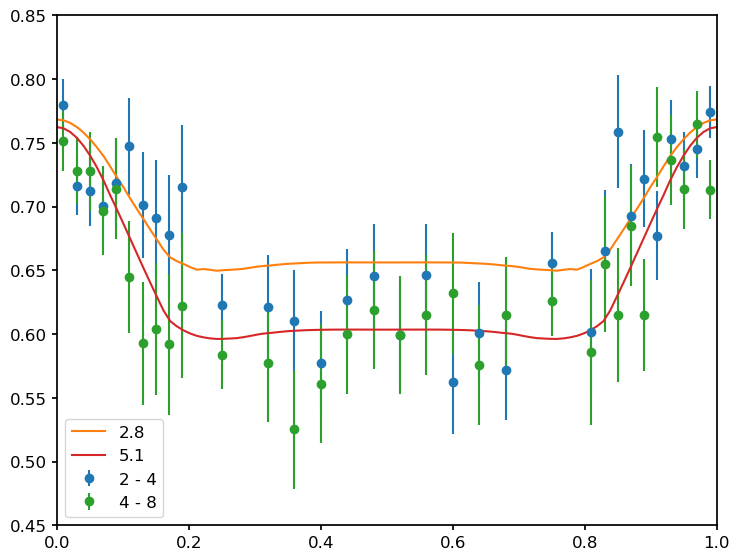

In [29]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, pol_deg[i,:], pol_deg_err[i,:], fmt='o',
                         label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    print(numpy.nanmean(pol_deg[i,:]),numpy.nanmean(pol_deg_err[i,:]**2/len(pol_deg_err[i,:]))**0.5)

    plt.plot(phase, magnetar.pol_deg(energy, phase),label='%2.1f' % energy        )
plt.legend()


## Plot the polarization angle vs phase

The result should be zero or 180 degrees because we are comparing with the model.

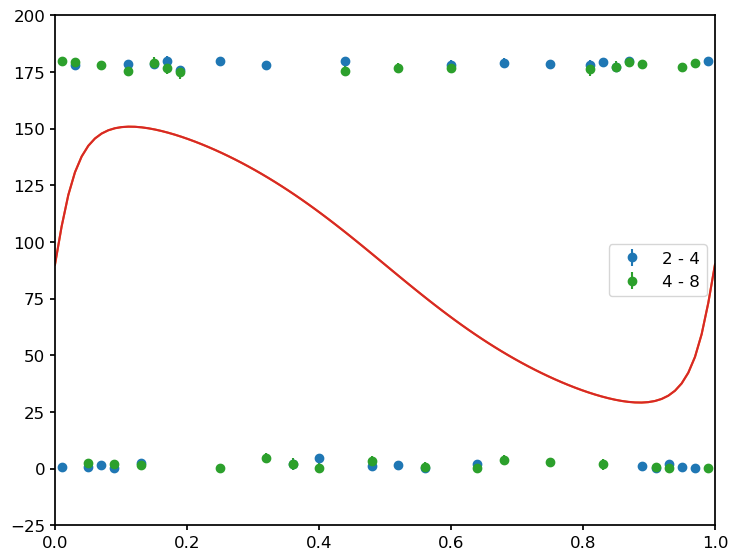

In [30]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, numpy.mod(pol_ang[i,:],180), pol_ang_err[i,:], fmt='o',
                     label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    plt.plot(phase, numpy.degrees(magnetar.pol_ang(energy, phase) )    )
plt.legend()

# Phase-Averaged Polarization (in the Rotating Frame)

These values will be more useful now because the polarization doesn't get smeared over the period.

## Create the new MCUBE with finer energy bins


In [31]:
ENERGY_BINNING2 = numpy.array([2., 3., 4., 6., 8.])

pipeline.xpbin(*rotated_EVT_FILE_PATH, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING2,overwrite=True)

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 12.6.0 (built on Fri, 02 Oct 2020 15:54:42 +0200).

    Copyright (C) 2015--2020, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407013R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407013R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_mcube.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407942R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407942R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   407268R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   407268R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Using cached xModulationFactor object at /projects/anaconda3/lib/python3.7/site-packages/ixpeobssim-12.6.0-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv005.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     58   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_mcube.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_mcube.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_mcube.fits']

## Load the MCUBE data into Python

In [32]:
file_list = ['%s_mcube.fits'% (s[:-5],)   for s in rotated_EVT_FILE_PATH]

mcube2 = xBinnedModulationCube.from_file_list(file_list)
pol_deg2 = mcube2.POL_DEG
pol_deg2_err= mcube2.POL_DEG_ERR
pol_ang2 = mcube2.POL_ANG
pol_ang2_err = mcube2.POL_ANG_ERR
emean2 = mcube2.ENERGY_MEAN

>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_mcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  MODULATION    1 BinTableHDU     58   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


## Plot the angle vs energy

<ErrorbarContainer object of 3 artists>

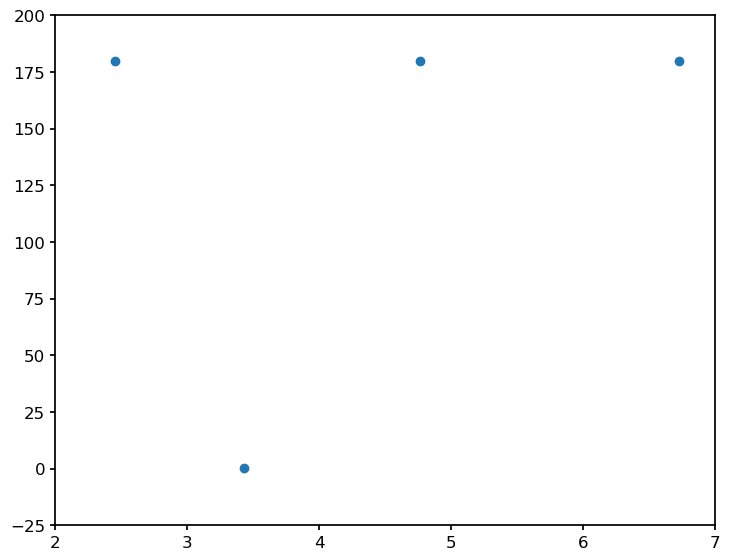

In [33]:
plt.errorbar(emean2, numpy.mod(pol_ang2,180), pol_ang2_err, fmt='o') 

## Plot the degree vs energy

<ErrorbarContainer object of 3 artists>

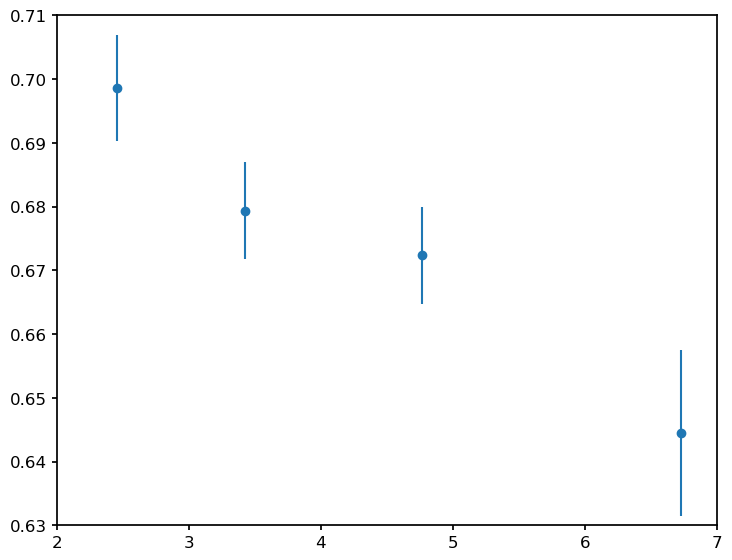

In [34]:
plt.errorbar(emean2, pol_deg2, pol_deg2_err, fmt='o')

## Q/I as a function of energy

Text(0, 0.5, 'Q/I')

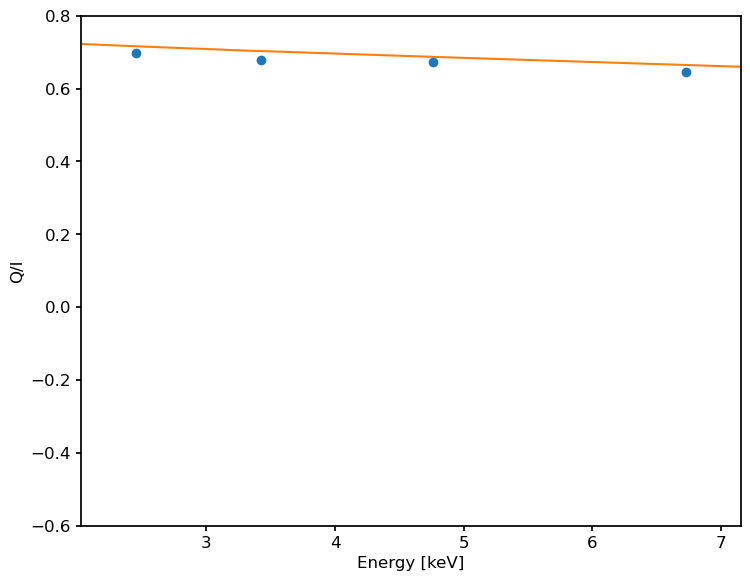

In [35]:
plt.errorbar(emean2, numpy.cos(numpy.radians(2*pol_ang2))*pol_deg2, pol_deg2_err, fmt='o')
plt.plot(magnetar.enerlist,qfl/mfl)
w=emean2[-1]-emean2[0]
plt.xlim(emean2[0]-0.1*w,emean2[-1]+0.1*w)

plt.xlabel('Energy [keV]')
plt.ylabel('Q/I')